## 1. Perform basic EDA :

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the dataset
data = pd.read_csv(r"C:\Users\aksha\Desktop\house_price.csv")
data



,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


In [6]:
# Check the first 5 few rows of the data
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250


In [7]:
# Check the last 5 rows of the data
data.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4,231.0,5,6689
13196,other,4 BHK,3600.0,5,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1,17.0,1,3090


In [8]:
# Check the data types of each column
print(data.dtypes)

location           object
size               object
total_sqft        float64
bath                int64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object


In [9]:
# Check the shape of the dataset
data.shape

(13200, 7)

In [10]:
data.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [16]:
# Check for the missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [20]:
# Check for the duplicated values and handling it
data.duplicated().sum()

1049

In [21]:
data.drop_duplicates(inplace = True)

In [22]:
data.shape

(12151, 7)

In [23]:
# Calculate the summary statistics
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12151.000000,12151.000000,12151.000000,12151.000000,1.215100e+04
mean,1574.846013,2.719941,115.471328,2.827504,8.132642e+03
std,1277.328354,1.372210,154.094133,1.326540,1.112329e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.312000e+03
50%,1290.000000,2.000000,74.000000,3.000000,5.500000e+03
75%,1700.000000,3.000000,123.500000,3.000000,7.461000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


## 2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median.
           a) Mean and Standard deviation
           b)Percentile method
           c) IQR(Inter quartile range method)
           d) Z Score method


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### a) Mean and Standard deviation

In [25]:
mean = data['price_per_sqft'].mean()
std_dev = data['price_per_sqft'].std()
lower_bound = mean - 2 * std_dev
upper_bound = mean + 2 * std_dev

In [26]:
# Remove outliers from the original dataset
data2 = data[(data['price_per_sqft'] >= lower_bound) & (data['price_per_sqft'] <= upper_bound)]

In [27]:
print("old_data:",data.shape)

old_data: (12151, 7)


In [28]:
print("shape of the data after removing the outliers:",data2.shape)

shape of the data after removing the outliers: (12146, 7)


<Axes: ylabel='price_per_sqft'>

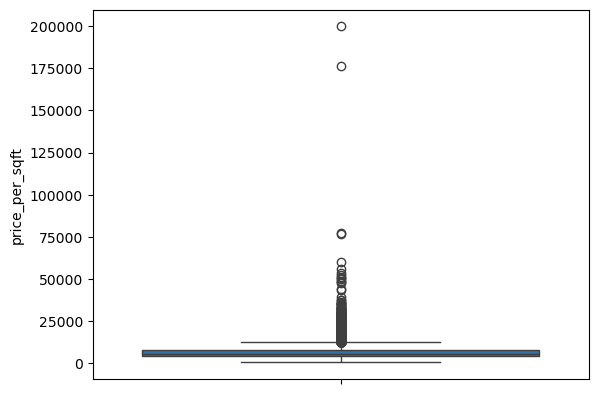

In [33]:
sns.boxplot(data2['price_per_sqft'])

#### b) Percentile method

In [35]:
upper_limit = data['price_per_sqft'].quantile(0.99)
lower_limit = data['price_per_sqft'].quantile(0.01)
print("upper limit:", upper_limit)
print("lower limit:", lower_limit)

upper limit: 24000.0
lower limit: 2532.0


In [36]:
# find the outliers
data.loc[(data['price_per_sqft'] > upper_limit) | (data['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6,370.0,6,36274
20,Kengeri,1 BHK,600.0,1,15.0,1,2500
45,HSR Layout,8 Bedroom,600.0,9,200.0,8,33333
130,Electronic City,2 BHK,880.0,1,16.5,2,1875
169,Attibele,1 BHK,450.0,1,11.0,1,2444
...,...,...,...,...,...,...,...
12948,other,10 Bedroom,7150.0,13,3600.0,10,50349
13013,other,4 Bedroom,1200.0,5,350.0,4,29166
13078,other,4 Bedroom,9200.0,4,2600.0,4,28260
13081,other,6 Bedroom,8000.0,6,2800.0,6,35000


In [37]:
# removing outliers using trimming
data3 = data.loc[(data2['price_per_sqft'] <= upper_limit) & (data['price_per_sqft'] >= lower_limit)]
print("before removing outliers:", len(data))
print("after removing outliers:", len(data3))
print("outliers:", len(data)-len(data3))

before removing outliers: 12151
after removing outliers: 11908
outliers: 243


<Axes: ylabel='price_per_sqft'>

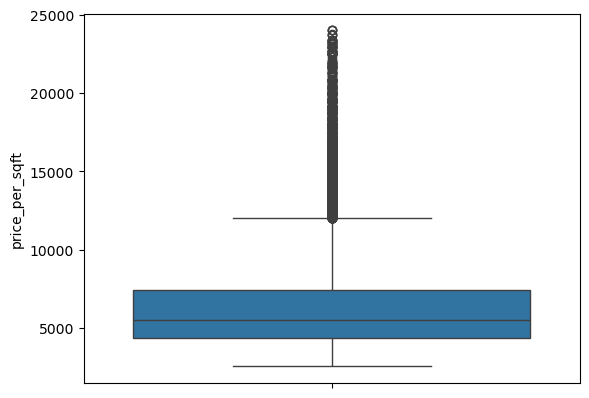

In [38]:
sns.boxplot(data3['price_per_sqft'])

#### c) IQR(Inter quartile range method)


In [39]:
q1 = data['price_per_sqft'].quantile(0.25)
q3 = data['price_per_sqft'].quantile(0.75)
iqr = q3 - q1

In [40]:
q1, q3, iqr

(4312.0, 7461.0, 3149.0)

In [41]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
upper_limit, lower_limit


(12184.5, -411.5)

In [42]:
# find the outliers
data.loc[(data['price_per_sqft'] > upper_limit) | (data['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4,600.0,4,18181
9,other,6 Bedroom,1020.0,6,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1,130.0,2,16250
...,...,...,...,...,...,...,...
13114,other,3 BHK,1903.0,2,293.0,3,15396
13141,other,3 Bedroom,2000.0,2,360.0,3,18000
13142,other,2 BHK,1140.0,1,185.0,2,16228
13157,other,7 Bedroom,1400.0,7,218.0,7,15571


In [43]:
# removing outliers using trimming
data4 = data.loc[(data['price_per_sqft'] <= upper_limit) & (data['price_per_sqft'] >= lower_limit)]
print("before removing outliers:", len(data))
print("after removing outliers:", len(data4))
print("outliers:", len(data)-len(data4))

before removing outliers: 12151
after removing outliers: 11009
outliers: 1142


<Axes: ylabel='price_per_sqft'>

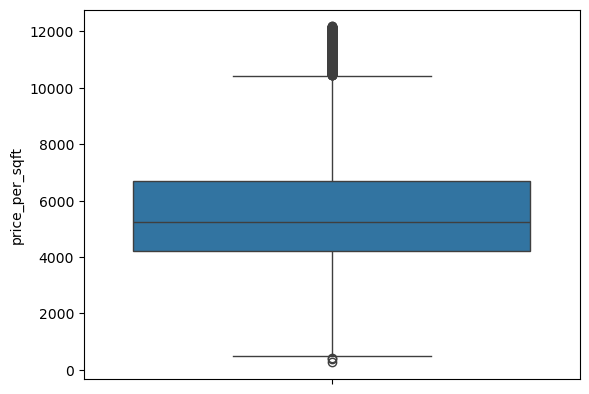

In [44]:
sns.boxplot(data4['price_per_sqft'])

#### d) Z Score method

In [45]:
# find the limits
upper_limit = data['price_per_sqft'].mean() + 3*data['price_per_sqft'].std()
lower_limit = data['price_per_sqft'].mean() - 3*data['price_per_sqft'].std()
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

Upper limit: 341831.3445273039
Lower limit: -325566.06084694836


In [46]:
# find the outliers
data.loc[(data['price_per_sqft'] > upper_limit) | (data['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3,74.0,3,672727
1106,other,5 Bedroom,24.0,2,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4,120.0,4,12000000
4924,other,7 BHK,5.0,7,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4,218.0,4,363333


In [47]:
# removing outliers using trimming
data5 = data.loc[(data['price_per_sqft'] < upper_limit) & (data['price_per_sqft'] > lower_limit)]

In [48]:
print("before removing outliers:", len(data))
print("after removing outliers:", len(data5))
print("outliers:", len(data)-len(data5))

before removing outliers: 12151
after removing outliers: 12146
outliers: 5


<Axes: ylabel='price_per_sqft'>

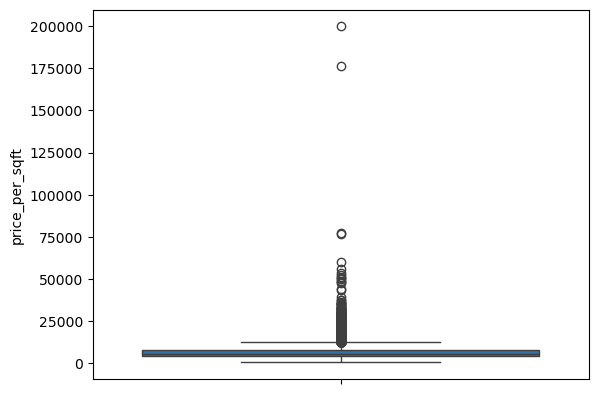

In [49]:
sns.boxplot(data5['price_per_sqft'])

## 3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data.

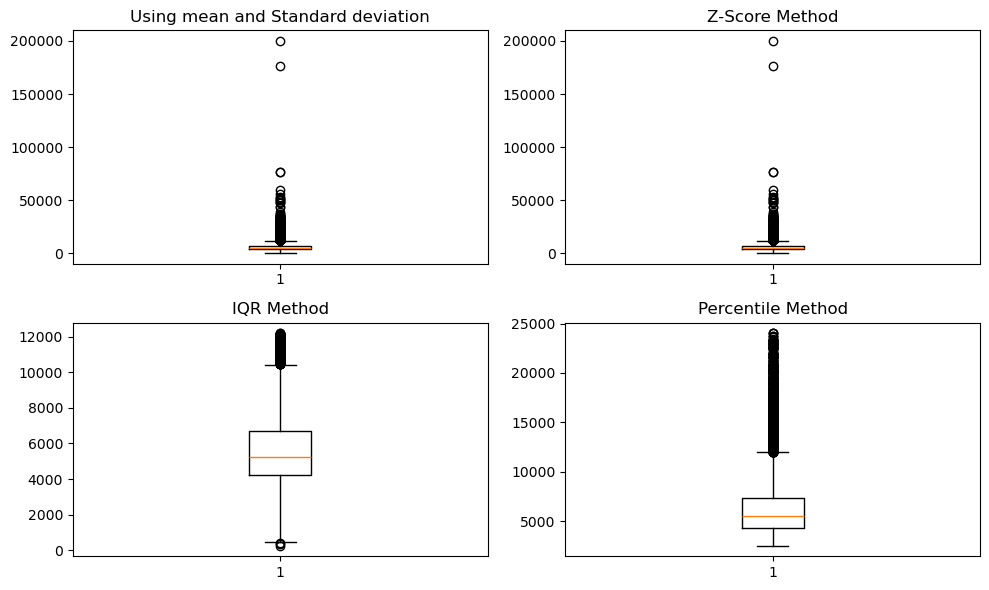

In [70]:
# Original data
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.boxplot(data2['price_per_sqft'])
plt.title('Using mean and Standard deviation')

# Data after removing outliers using Percentile Method
plt.subplot(2,2,4)
plt.boxplot(data3['price_per_sqft'])
plt.title('Percentile Method')

# Data after removing outliers using IQR Method
plt.subplot(2,2,3)
plt.boxplot(data4['price_per_sqft'])
plt.title('IQR Method')

# Data after removing outliers using Z-Score Method
plt.subplot(2,2,2)
plt.boxplot(data5['price_per_sqft'])
plt.title('Z-Score Method')

plt.tight_layout()
plt.show()

#### 
* Based on the analysis using four different methods : Mean & Standard deviation, IQR Method, Percentile Method, and Z-Score Method.The IQR Method appears to be the most effective approach for removing the outliers from this dataset.This method successfully identified and removed outliers, resulting in a more stable and symmetric distribution.In comparison the Z-Score method identified 5 outliers,suggesting that it may not be as effective in capturing the full extent of oulier presence in this dataset.Therefore, based on the results, the IQR Method is recommended as the best approach for removing outliers from this dataset.



## 4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation. 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [64]:
# Load the dataset
file_path = r"C:\Users\aksha\Desktop\house_price.csv"
data = pd.read_csv(file_path)

# Remove duplicates
data.drop_duplicates(inplace=True)

In [65]:
# Check initial skewness and kurtosis
skewness_before = data['price_per_sqft'].skew()
kurtosis_before = data['price_per_sqft'].kurt()

print(f'Skewness before transformation: {skewness_before:.2f}')
print(f'Kurtosis before transformation: {kurtosis_before:.2f}')

Skewness before transformation: 103.90
Kurtosis before transformation: 11135.81


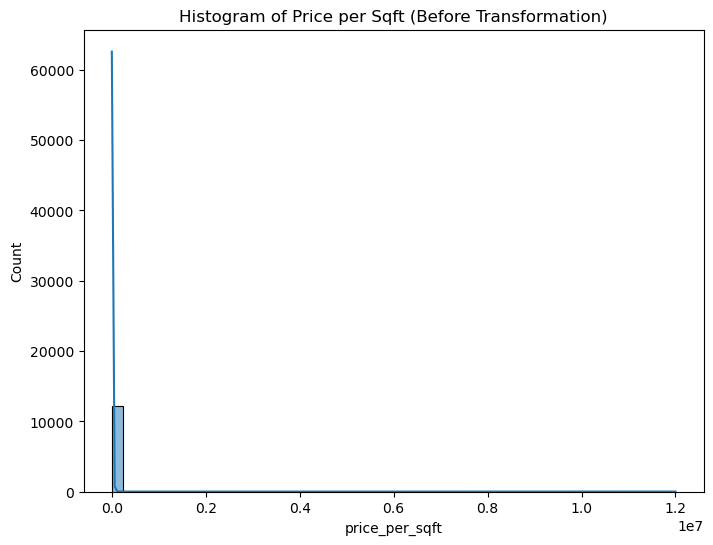

In [66]:
# Plot histogram before transformation
plt.figure(figsize=(8, 6))
sns.histplot(data['price_per_sqft'], kde=True, bins=50)
plt.title('Histogram of Price per Sqft (Before Transformation)')
plt.show()

In [69]:
# Apply log transformation using log1p to avoid issues with zero values
data['price_per_sqft_Log'] = np.log1p(data['price_per_sqft'])

In [70]:
# Check skewness and kurtosis after transformation
skewness_after = data['price_per_sqft_Log'].skew()
kurtosis_after = data['price_per_sqft_Log'].kurt()

print(f'Skewness after transformation: {skewness_after:.2f}')
print(f'Kurtosis after transformation: {kurtosis_after:.2f}')

Skewness after transformation: 1.40
Kurtosis after transformation: 9.41


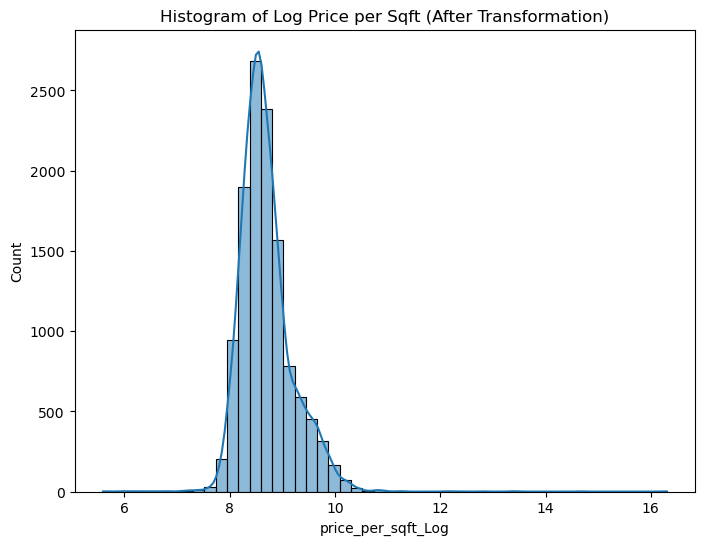

In [71]:
# Plot histogram after transformation
plt.figure(figsize=(8, 6))
sns.histplot(data['price_per_sqft_Log'], kde=True, bins=50)
plt.title('Histogram of Log Price per Sqft (After Transformation)')
plt.show()

## 5. Check the correlation between all the numerical columns and plot heatmap.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
# File path
file_path = r"C:\Users\aksha\Desktop\house_price.csv"

# Load the dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Remove duplicates (if any)
data.drop_duplicates(inplace=True)

Dataset loaded successfully!


In [41]:
# Selecting only numerical columns
numerical_data = data.select_dtypes(include=['number'])


In [42]:
# Compute correlation matrix
correlation_matrix = numerical_data.corr()

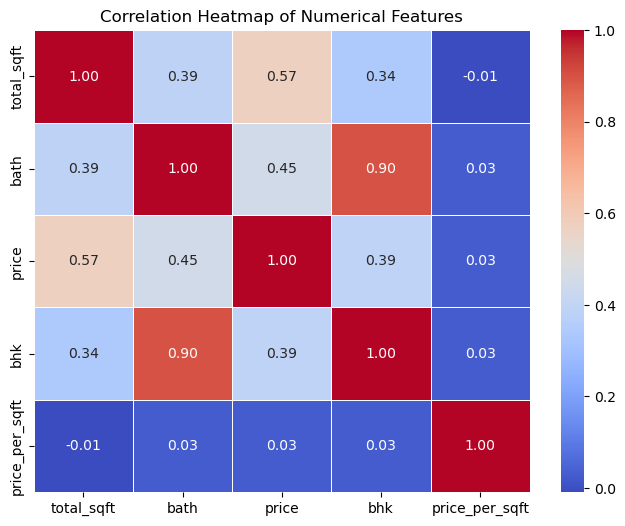

In [43]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


## 6. Draw Scatter plot between the variables to check the correlation between them.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# File path
file_path = r"C:\Users\aksha\Desktop\house_price.csv"

# Load the dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Remove duplicates (if any)
data.drop_duplicates(inplace=True)


Dataset loaded successfully!


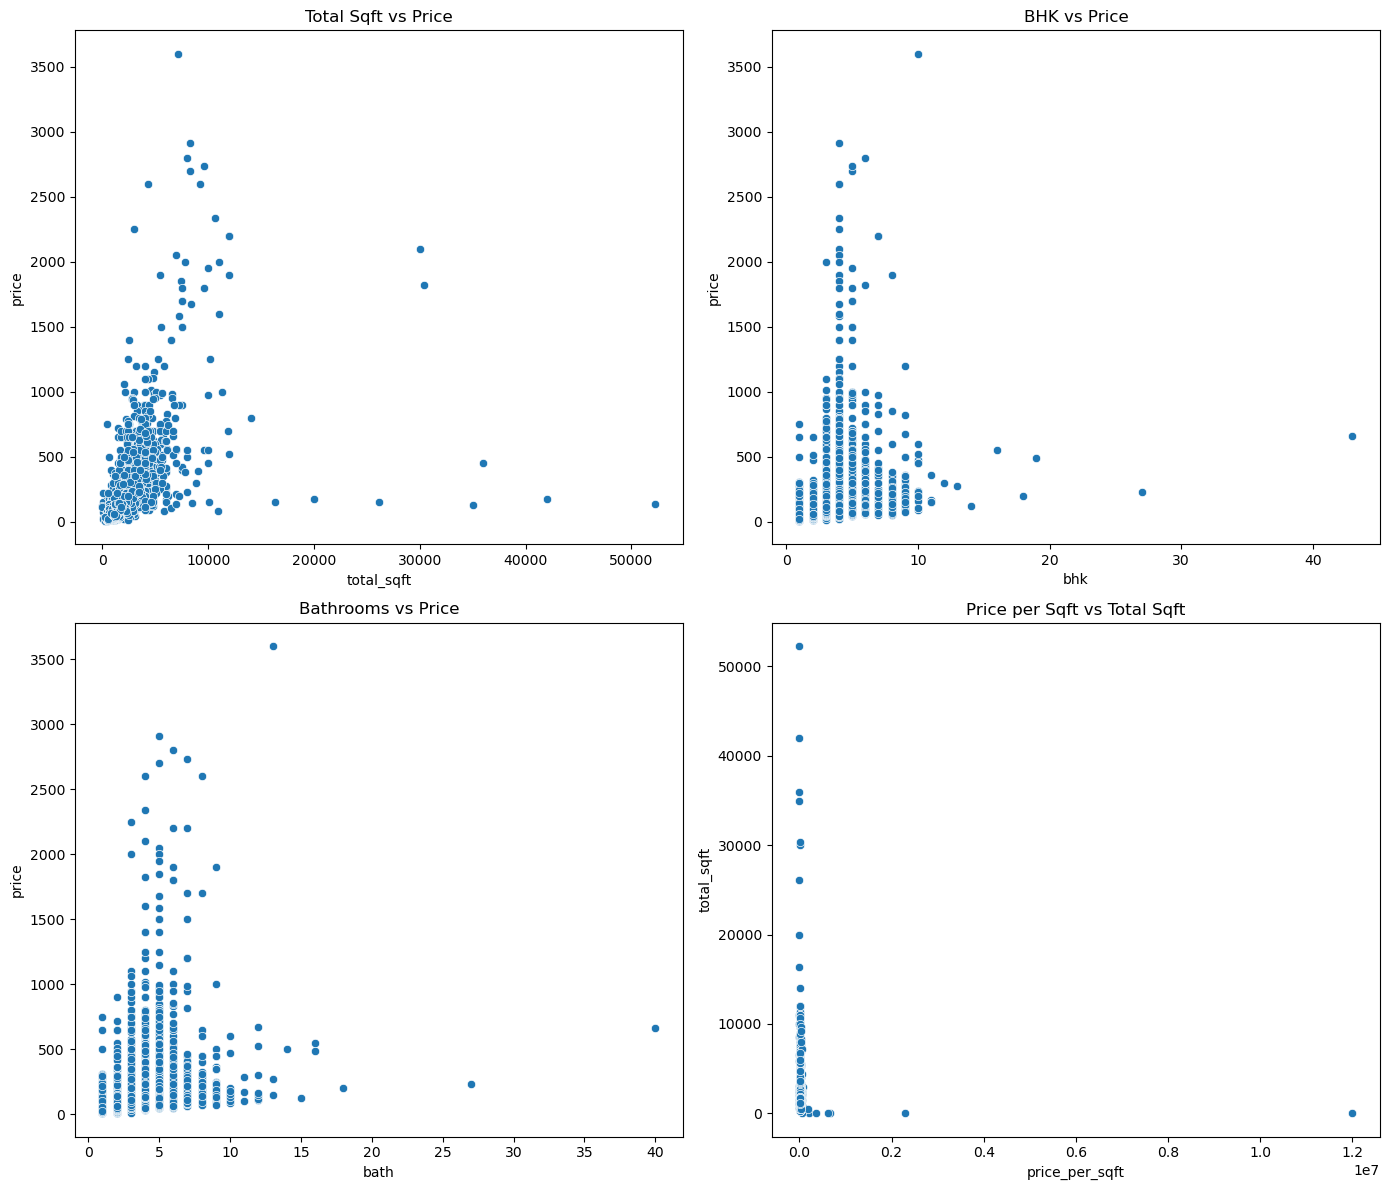

In [54]:
# Set figure size
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Scatter plot: Total Sqft vs Price
sns.scatterplot(x=data['total_sqft'], y=data['price'], ax=axes[0, 0])
axes[0, 0].set_title("Total Sqft vs Price")

# Scatter plot: BHK vs Price
sns.scatterplot(x=data['bhk'], y=data['price'], ax=axes[0, 1])
axes[0, 1].set_title("BHK vs Price")

# Scatter plot: Bathrooms vs Price
sns.scatterplot(x=data['bath'], y=data['price'], ax=axes[1, 0])
axes[1, 0].set_title("Bathrooms vs Price")

# Scatter plot: Price per Sqft vs Total Sqft
sns.scatterplot(x=data['price_per_sqft'], y=data['total_sqft'], ax=axes[1, 1])
axes[1, 1].set_title("Price per Sqft vs Total Sqft")

# Improve layout and display the plot
plt.tight_layout()
plt.show()